In [46]:
# Seaborn is a statistical plotting library which is built on top of matplotlib. Seaborn is used for all the statistical
# ploting mostly like bar graph, pie chart, heat map etc.

# In order to install seaborn we can use :
# pip install seaborn for all python distributions and conda install seaborn for conda distribution

# OPEN THE TERMINAL AND SHOW

In [47]:
import seaborn as sns

In [48]:
import numpy as np

In [49]:
# seaborn has many default pandas libraries we can use for our referencs:

tips= sns.load_dataset('tips')

In [50]:
# tips basically the dataset which says the tips given by the people in restaurants

In [51]:
# Let's check out the dataset

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
# now let's check the first poloting named dis plot
# dist plot basically tells us the distribution of a specific feature means it shows a graphical representation of the 
# feature or column and how it is distributed from start to end

D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

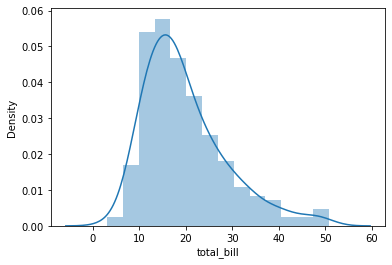

In [53]:
# Let's check out the 'totla_bill' column

sns.distplot(tips['total_bill'])

D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

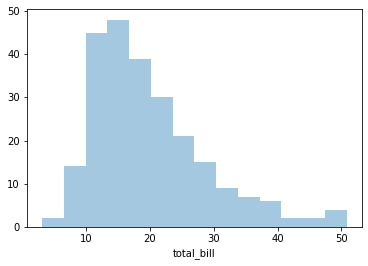

In [54]:
# notice here we have histogram and a curve showing the shape of the histogram. The curve is called as KDE
# which we will discuss later in this lecture

# so now let's just make the kde as false

sns.distplot(tips['total_bill'], kde=False)

In [55]:
# here we can see the number of people in y axis and total_bill in x-axis, so we can say that the maximum total_bills lie
# between 10-20 dollars

<AxesSubplot:xlabel='total_bill'>

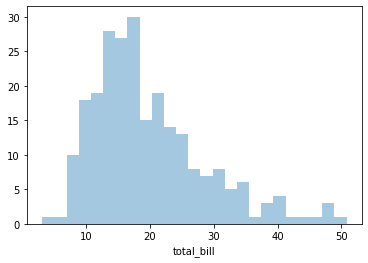

In [56]:
# we can change the number of bins of hists to have a more clearer view

sns.distplot(tips['total_bill'], kde=False, bins=25)

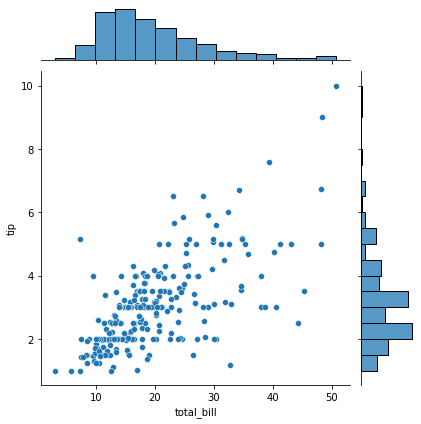

In [57]:
# Now let's discuss about a plot which works well for bi-variate.
sns.jointplot(x='total_bill',y='tip',data=tips) # here it takes x,y arguments as the column names of dataframe we want 
# to compare and then data as the dataframe name

In [58]:
# so here we can see the histogram for tip in y-axis and total_bill in x-axis

# we also have a scatter plot which tells the relationship between tip and total_bill

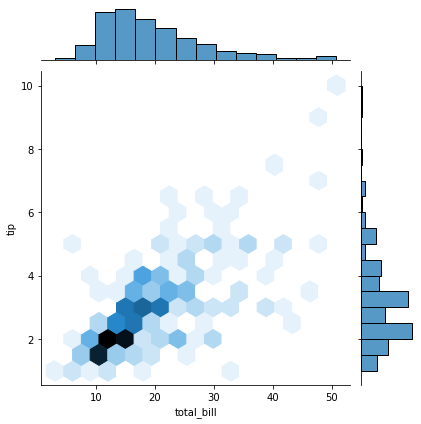

In [59]:
# jointplot has one more important aspect as kind which says that which type of graph we want for comparision

# so here it is scatter plot by default we can change it if we want like:

sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

In [60]:
# so here we have the comarision graph as hexagon

In [61]:
# now let's discuss about pairplot
# so pairplot is used to provide us pair wise relationship between numerical columns

In [62]:
# pairplot will show the all possible pair wise comparison between all the columns we have in the dataframe
# so pair wise is used to identify how similar is one group of data with another

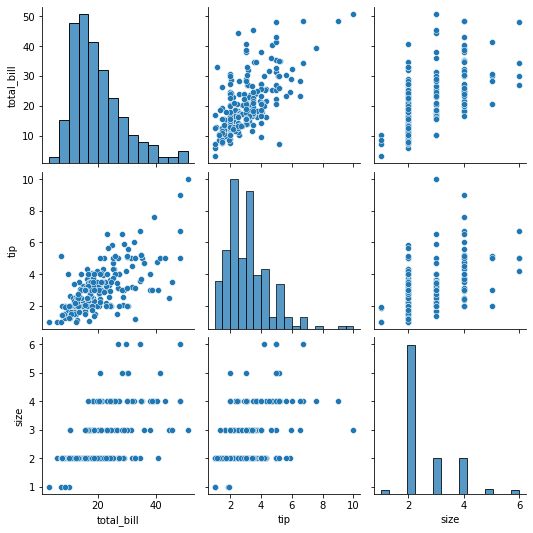

In [63]:
sns.pairplot(tips)

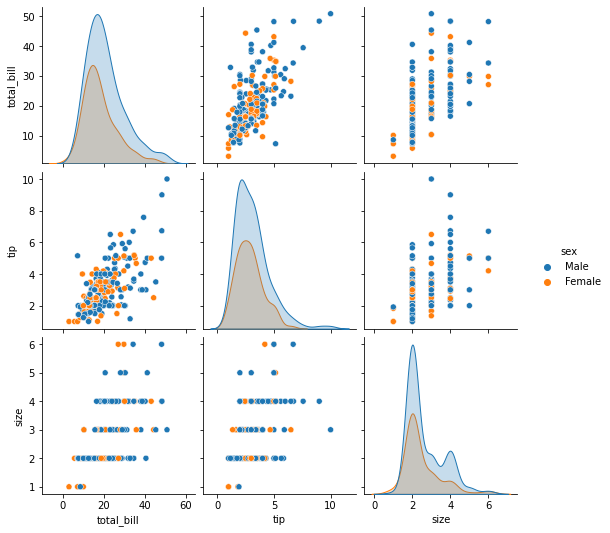

In [64]:
# we can also add the categorical column using the argument called as hue

sns.pairplot(tips,hue='sex')

In [65]:
# so here all the blue points are male and orange points are female

# also notice that here we are having total_bill, tip and size are the variables in both x and y axis

<AxesSubplot:xlabel='total_bill'>

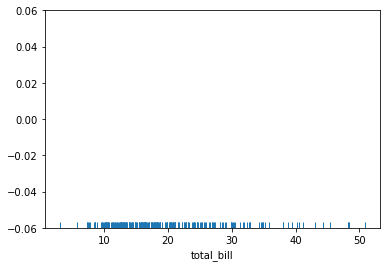

In [66]:
# Now let's discuss about rug plot

# So rug plot is also used in univariate series

sns.rugplot(tips['total_bill'])

In [67]:
# so here it tries to get a line for each entry of the column

In [68]:
# Now let's discuss about KDE plot or kernel density estimation plot

In [69]:
# so based on the rug plots we draw the normal distributions of the data points and then we join all the normal distributions
# to get the KDE plot

D:\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

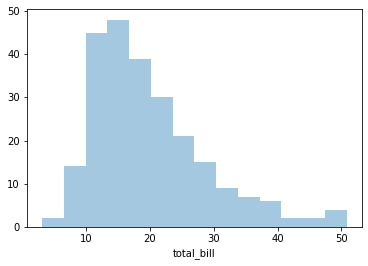

In [70]:
# What I mean by that is: 

sns.distplot(tips['total_bill'], kde=False) # we have this distplot with us

In [71]:
# now notice that for each bins the normal distribution is different
# let's create them with some bunch of codes

(0.0, 1.0)

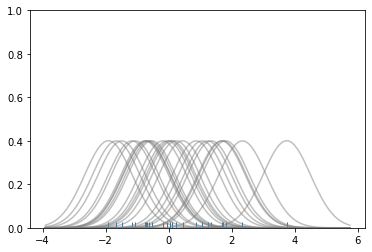

In [72]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [73]:
# now let's sum up all to get the KDE plot

Text(0.5, 0.98, 'Sum of the Basis Functions')

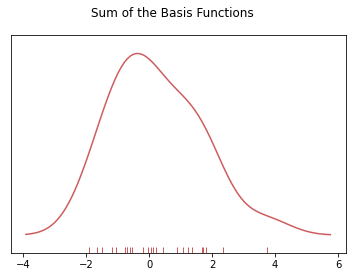

In [74]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='sex', ylabel='tip'>

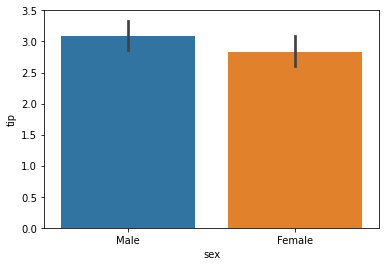

In [75]:
# now let's discuss about bar plot

# bar plot can be called as the ploting related to group by

sns.barplot(x='sex',y='tip',data=tips) # it will show the average value for the groups based on the gender as male and female

<AxesSubplot:xlabel='sex', ylabel='tip'>

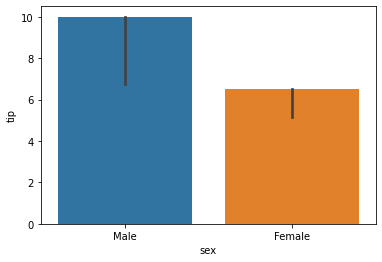

In [76]:
# by default the estimator here is mean that is the data is calculated based on the mean to plot the graph
# we can go ahead and change it if we want

sns.barplot(x='sex',y='tip',data=tips,estimator=np.max)

In [77]:
# now it is showing the maximum tips paid by male and female

In [78]:
# we can be able to find the count of a categorical series or a column by using count plot

<AxesSubplot:xlabel='sex', ylabel='count'>

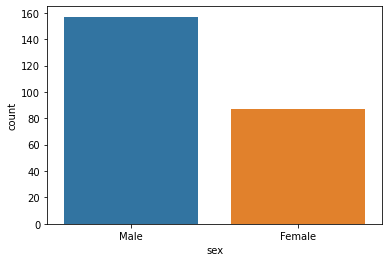

In [79]:
sns.countplot(x='sex',data=tips)

In [80]:
# now let's discuss about box plot

In [81]:
# it is used to show the distribution of categorical data

<AxesSubplot:xlabel='day', ylabel='tip'>

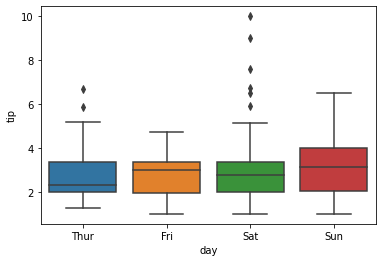

In [84]:
# now let's draw one

sns.boxplot(x='day',y='tip',data=tips)

In [85]:
# So this box plot shows the quartiles of the data and the whiskers show the extension of the data

<AxesSubplot:xlabel='day', ylabel='tip'>

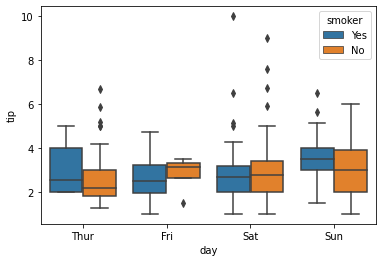

In [87]:
# we can also add one more extra category in the box plot using the argument hue

sns.boxplot(x='day',y='tip',data=tips,hue='smoker')

In [88]:
# now let's discuss about a violin plot

# a violin plot is almost similar like a box plot

<AxesSubplot:xlabel='sex', ylabel='tip'>

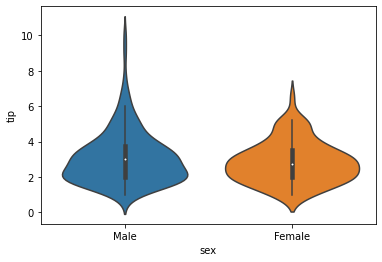

In [89]:
sns.violinplot(x='sex',y='tip',data=tips) # here we are taking x as a categorical data, y as numerical data

In [90]:
# the big difference between a box plot and a violin plot is box plot is easier to understand whereas violin plot is a bit
# difficult one to understand by looking at it

<AxesSubplot:xlabel='sex', ylabel='tip'>

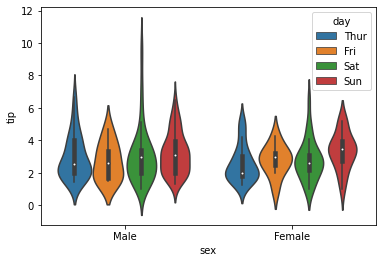

In [91]:
# we can also have hue with violin plot as well for extra layer of categorical distribution

# let's check

sns.violinplot(x='sex',y='tip',data=tips, hue='day')

<AxesSubplot:xlabel='day', ylabel='tip'>

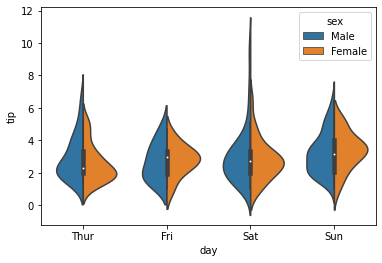

In [93]:
# notice here we are having 4 violins per gender we can have them in one violin also using the argument called split=True
# but for the split we need to have only 2 classes so we will do it in this way

sns.violinplot(x='day',y='tip',data=tips,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='tip'>

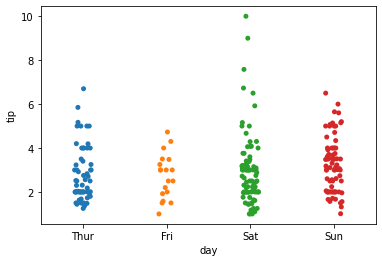

In [94]:
# we can also have strip plot which is basically similar to the box and violin plot like we will have one categorical and
# one numerical columns and we will be able to see the comparisions

sns.stripplot(x='day',y='tip',data=tips)

D:\Anaconda3.8\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='tip'>

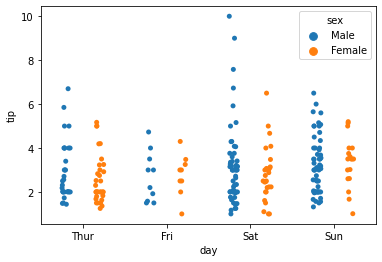

In [95]:
# we can also have hue and split like we had in box and violin plot

sns.stripplot(x='day',y='tip',data=tips,hue='sex',split=True)

D:\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda3.8\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='tip'>

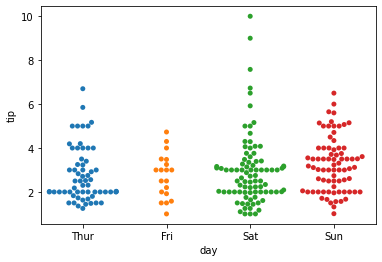

In [96]:
# we can also combine the violin plot and strip plot together and get a new plot named swarm plot which will showcase all
# the points

sns.swarmplot(x='day',y='tip',data=tips)

In [97]:
# the major disadvantage of swarm plot is that for very large datasets it will not be able to justfy the dustributions

D:\Anaconda3.8\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


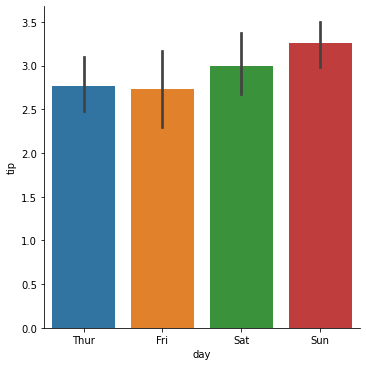

In [98]:
# now let's discuss about factor plot, the best thing about it is it has a kind argument in which we can specify the kind of
# plot we want

sns.factorplot(x='day',y='tip',data=tips,kind='bar')